# Image processing

## Matplotlib `imshow`

The matplotlib function `imshow()` takes as its argument a numpy array, and displays an image described by this array. If the array is 2-dimensional, the image will have one square for each element of the array. The color of each square is determined by the value of the corresponding array element and the color map used by `imshow()`.

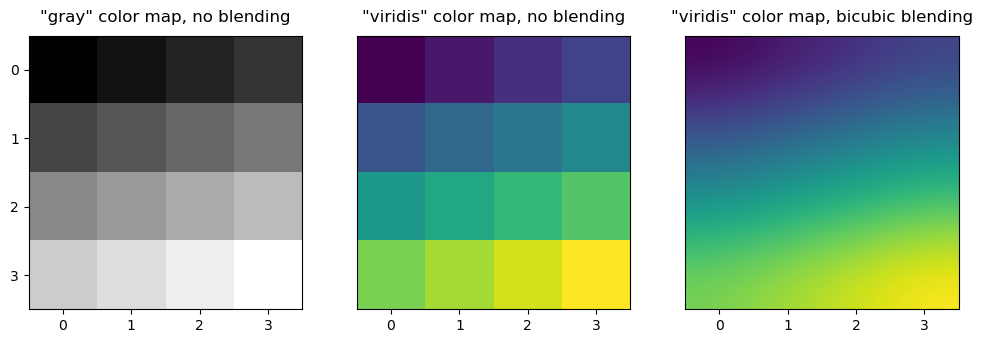

In [84]:
import matplotlib.pyplot as plt
import numpy as np



# create an nxn numpy array
n = 4
a = np.reshape(np.linspace(0,1,n**2), (n,n))

plt.figure(figsize=(12,4.5))

# use imshow to plot the array
plt.subplot(131)
plt.imshow(a,                         # numpy array generating the image
            cmap = 'gray',            # color map used to specify colors
            interpolation='nearest'   # algorithm used to blend square colors; with 'nearest' colors will not be blended
            )
plt.xticks(range(n))
plt.yticks(range(n))
plt.title('"gray" color map, no blending', y=1.02, fontsize=12)

# the same array as above, but with different color map
plt.subplot(132)
plt.imshow(a, cmap = 'viridis', interpolation='nearest')
plt.yticks([])
plt.xticks(range(n))
plt.title('"viridis" color map, no blending', y=1.02, fontsize=12)

# the same array as above, but with blending
plt.subplot(133)
plt.imshow(a, cmap = 'viridis', interpolation='bicubic')
plt.yticks([])
plt.xticks(range(n))
plt.title('"viridis" color map, bicubic blending', y=1.02, fontsize=12)

plt.show()

**Note.** Color maps assign colors to numbers from the range [0, 1]. By default, `imshow()` scales elements of the numpy array so that the smallest element becomes 0, the largest becomes 1, and intermediate values are mapped to the interval
[0, 1] by a linear function. Optionally `imshow()` can be called with arguments `vmin` and `vmax`. In such case, all elements of the array smaller or equal to `vmin` are mapped to 0, all elements greater or equal to `vmax` are sent to 1, and the elements between `vmin` and `vmax` are mapped in a linear fashion into the interval [0,1].


## Matplotlib `imsave`

The `imsave()` function is similar to `imshow()`, but instead of displaying an image it saves it to a file. In the file each element of the numpy array describes one pixel. The `imsave()` function does not have the `interpolation` argument.

In [85]:
n = 500

# create an nxn numpy array with random entries
rng = np.random.default_rng(seed = 0)
a = rng.random((n,n))

# save the image to a file 'test.png' using  the 'inferno' color map to specify colors
plt.imsave('test.png', a, cmap = 'inferno')

[Here](test.png) is a file created by the above code.

## RGB Colors

RGB is a color model commonly used to describe colors displayed on computer screens. RGB uses three basic colors: red, green, and blue. Other colors are obtained by mixing these basic components in various proportions.

```{image} rgb_colors.svg
:alt: RGB colors
```

In the RGB model each color is described by three numbers that give intensities of red, green, and blue. In many other computer applications these numbers are integers between 0 and 255. The triple `(0,0,0)` represents the black color, `(255, 0, 0)` represents red and `(255,255,255)` represents white.

<br/>

In matplotlib, RGB colors can be also expressed as triples of floating point number between 0 and 1. In such case, `(0., 0., 0.)` is black color, `(1., 0., 0.)`  is red  and `(1., 1., 1.)` is white. 


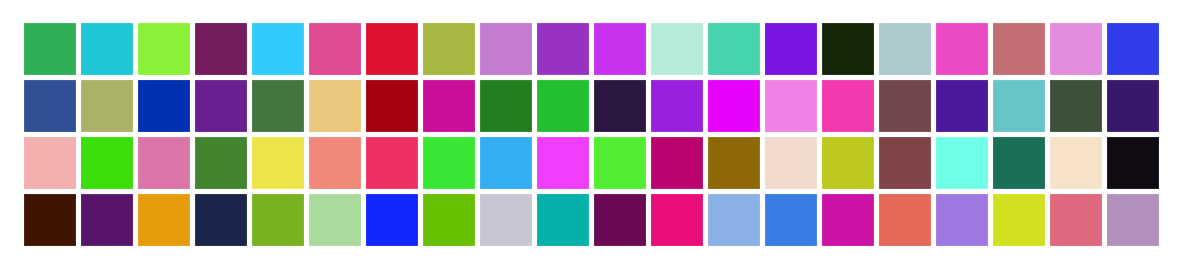

In [30]:
n = 20
m = 4

rng = np.random.default_rng(seed = 12)
# three nxm numpy arrays with randomly selected RGB coordinates
r = rng.random((n,m))
g = rng.random((n,m))
b = rng.random((n,m))


fig = plt.figure(figsize =(15, 4))
fig.set_facecolor('w')
plt.axes(aspect='equal')
plt.ylim(-0.7, 3.7)
plt.xlim(-0.7, 19.7)

for i, j in [(i, j) for i in range(n) for j in range(m)]:
    # plot a square with color given by RGB coordinates
    plt.plot(i, j, 's', color=(r[i,j], g[i,j], b[i,j]), 
             markeredgecolor='w', 
             markeredgewidth=3,
             ms=40)

ax = plt.gca()
ax.set_facecolor('k')
plt.axis('off')

plt.show()

## `imshow` and `imsave` with RGB colors

The functions `imshow()` and `imsave()` can be used with 3-dimensional numpy arrays of dimensions m $\times$ n $\times$ 3. If `a` is such an array, then its three three slices `a[:,:, 0]`, `a[:,:, 1]` and `a[:,:, 2]` give RGB coordinates of colors in the image.

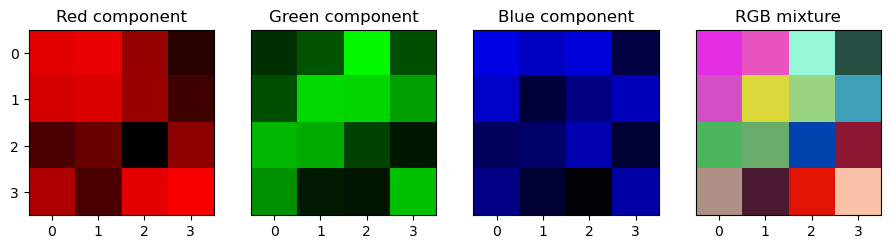

In [42]:
import matplotlib.pyplot as plt
import numpy as np

n = 4

# create a 3-dimensional numpy array with randomly selected values
rng = np.random.default_rng(seed = 220)
a = rng.random((n,n,3))


plt.figure(figsize=(11,3))

plt.subplot(141)
r = a.copy()
r[:,:,[1,2]] = 0    # set green and blue coordinates to 0; this will display reds only
plt.yticks(range(n))
plt.xticks(range(n))
plt.title('Red component')
plt.imshow(r, interpolation='nearest')

plt.subplot(142)
g = a.copy()
g[:,:,[0,2]] = 0    # set red and blue coordinates to 0 to show greens
plt.xticks(range(n))
plt.yticks([])
plt.title('Green component')
plt.imshow(g, interpolation='nearest')

plt.subplot(143)
b = a.copy()
b[:,:,[0,1]] = 0    # set red and green coordinates to 0 to show blues
plt.yticks([])
plt.xticks(range(n))
plt.title('Blue component')
plt.imshow(b, interpolation='nearest')

plt.subplot(144)
plt.xticks(range(n))
plt.yticks([])
plt.title('RGB mixture')
plt.imshow(a, interpolation='nearest')

plt.show()

## `imread`

While `imshow()` and `imsave()` produce an image from a numpy array, the `imread()` function takes as its argument 
an image file and converts it into a numpy array. The following code uses the file [`tiger.jpg`](tiger.jpg).

In [43]:
img_array = plt.imread('tiger.jpg')

`img_array` a 3-dimensional numpy array that describes RGB coordinates
of all pixels of the image:

In [44]:
print(img_array)

[[[ 60  73  19]
  [ 62  75  21]
  [ 63  78  23]
  ...
  [211 212 170]
  [216 221 181]
  [221 227 191]]

 [[ 53  65  15]
  [ 53  67  16]
  [ 55  69  16]
  ...
  [213 214 170]
  [220 222 183]
  [225 229 192]]

 [[ 44  57  11]
  [ 45  58  12]
  [ 45  61  14]
  ...
  [215 214 170]
  [220 222 182]
  [227 229 192]]

 ...

 [[ 91 123  47]
  [ 89 121  45]
  [ 93 121  47]
  ...
  [ 81  75  39]
  [ 75  62  30]
  [ 76  59  29]]

 [[ 96 128  52]
  [ 87 117  43]
  [ 79 106  35]
  ...
  [ 76  70  34]
  [ 72  59  25]
  [ 74  57  27]]

 [[ 85 116  40]
  [ 73 103  29]
  [ 62  89  18]
  ...
  [ 74  68  32]
  [ 72  59  25]
  [ 77  61  28]]]


Notice that entries of `img_array` are positive integers. This is the case, because, as it was mentioned above, in computer applications RGB coordinates are often represented by integers in the range 0-255. For the purposes of
manipulating this array it will be convenient to convert its entries into floats in the range 0.0-1.0. This can be done by dividing all entries of `img_array` by 255:

In [45]:
tiger = img_array/255
print(tiger)

[[[0.23529412 0.28627451 0.0745098 ]
  [0.24313725 0.29411765 0.08235294]
  [0.24705882 0.30588235 0.09019608]
  ...
  [0.82745098 0.83137255 0.66666667]
  [0.84705882 0.86666667 0.70980392]
  [0.86666667 0.89019608 0.74901961]]

 [[0.20784314 0.25490196 0.05882353]
  [0.20784314 0.2627451  0.0627451 ]
  [0.21568627 0.27058824 0.0627451 ]
  ...
  [0.83529412 0.83921569 0.66666667]
  [0.8627451  0.87058824 0.71764706]
  [0.88235294 0.89803922 0.75294118]]

 [[0.17254902 0.22352941 0.04313725]
  [0.17647059 0.22745098 0.04705882]
  [0.17647059 0.23921569 0.05490196]
  ...
  [0.84313725 0.83921569 0.66666667]
  [0.8627451  0.87058824 0.71372549]
  [0.89019608 0.89803922 0.75294118]]

 ...

 [[0.35686275 0.48235294 0.18431373]
  [0.34901961 0.4745098  0.17647059]
  [0.36470588 0.4745098  0.18431373]
  ...
  [0.31764706 0.29411765 0.15294118]
  [0.29411765 0.24313725 0.11764706]
  [0.29803922 0.23137255 0.11372549]]

 [[0.37647059 0.50196078 0.20392157]
  [0.34117647 0.45882353 0.16862745]


We can use `imshow()` to display the image:

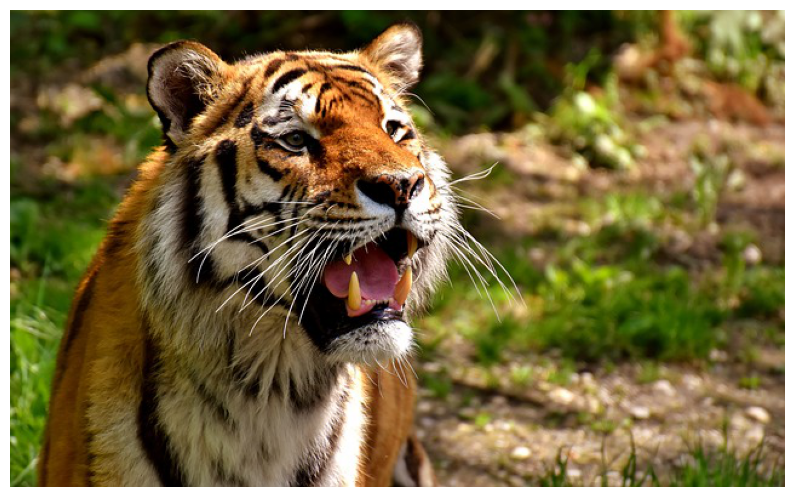

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(tiger)
plt.axis('off')
plt.show()

The image can be modified by changing the numpy array. For example, if we multiply the array by a number $0 \leq x \leq 1$, it will darken the image:

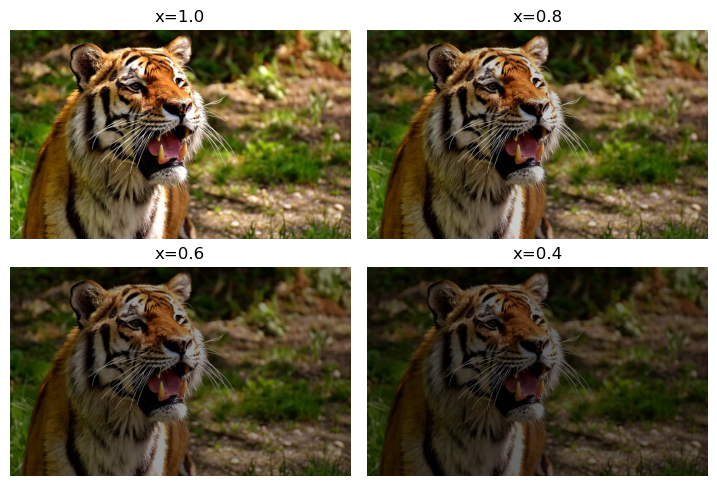

In [59]:
plt.figure(figsize=(9,6))

for i in range(1,5):
    plt.subplot(2,2,i)
    x = 1 - 0.2*(i-1)
    plt.axis('off')
    plt.title('x={:.1f}'.format(x))
    plt.imshow(tiger*x)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.05, 
                    hspace=0.05) 

plt.show()

We can crop the image by taking a slice of the array:

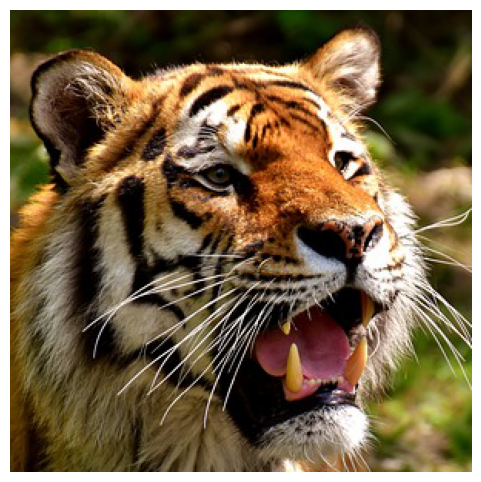

In [61]:
plt.figure(figsize=(6,6))
plt.imshow(tiger[:300,100:400,:])
plt.axis('off')
plt.show()

If we set elements of the array that give green and blue coordinates of RGB colors to 0, we will get the red part of the image:

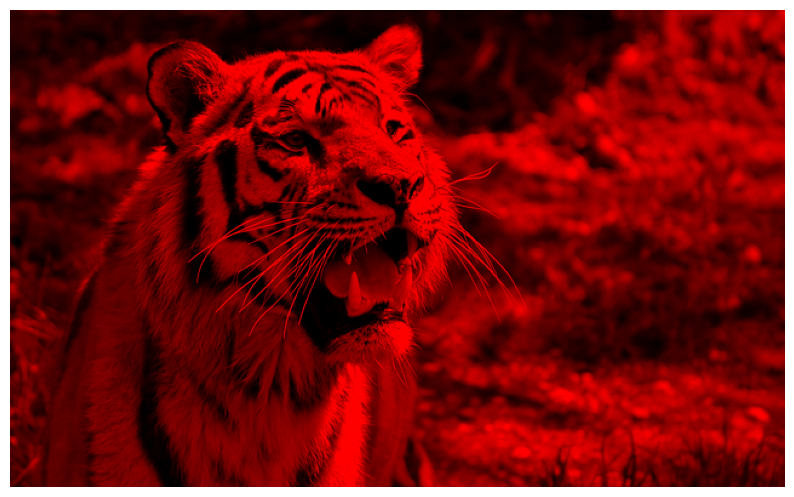

In [62]:
red_tiger = tiger.copy()
red_tiger[:, :,[1,2]] = 0

plt.figure(figsize=(10,10))
plt.imshow(red_tiger)
plt.axis('off')
plt.show()

## `imageio`

`imageio` is a useful Python library that provides tools for reading image and video files in various formats.  In particular, while matplotlib `imread()` can read local image files only, with `imageio` it is possible to read images localed online, by specifying their urls:

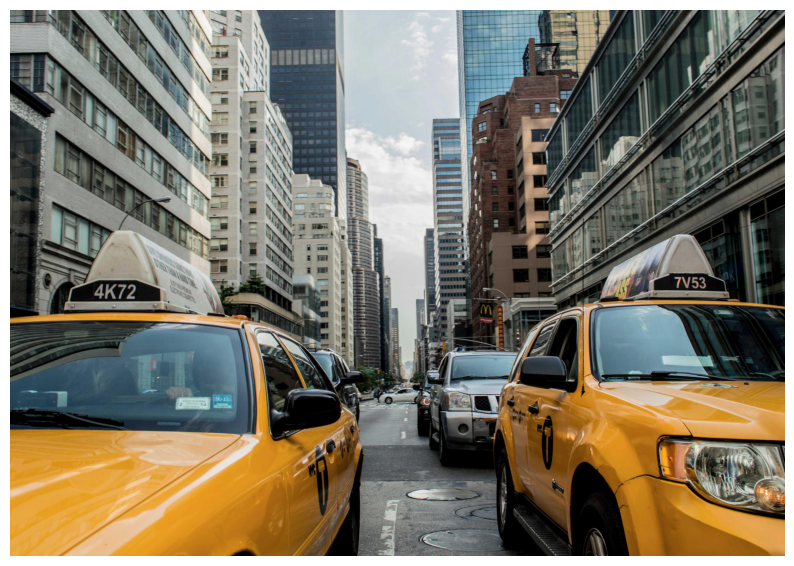

In [81]:
import imageio.v3 as iio

img = iio.imread('https://picsum.photos/id/376/2500/1762')

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()